# 基于 stable diffusion XL 的图生图

In [1]:
!pip install xformers

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

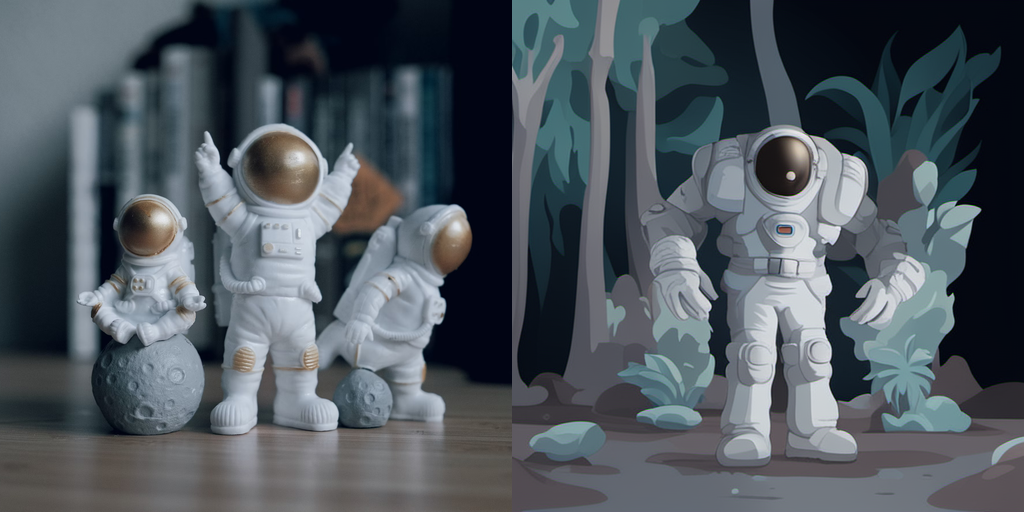

In [79]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import make_image_grid, load_image

model_path="/models/stable-diffusion-xl-refiner-1.0"

pipeline = AutoPipelineForImage2Image.from_pretrained(
    model_path, torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
pipeline.enable_xformers_memory_efficient_attention()

init_image = load_image("./img2img-init.png")

prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"
generator = torch.Generator(device="cuda").manual_seed(7211250)

# pass prompt and image to pipeline
image = pipeline(prompt, image=init_image, strength=0.586,generator=generator).images[0]
make_image_grid([init_image, image], rows=1, cols=2)